# __MODELO DE POZOS__

Se busca identificar la región con mayor margen de beneficio, analizando las caracteristicas, riesgos y rendimiento de cada una de las regiones proporcionadas.

## Carga de datos y exploracion general

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Realizamos funcion EDA para analizar los datos de cada región
def analizar_region(data):
    """
    Analiza los datos y muestra información general, estadísticas, 
    distribuciones, boxplots y matriz de correlación.

    Args:
        data (str): La ruta al archivo CSV.
    """
    # Leer el archivo CSV
    try:
        region_data = pd.read_csv(data)
    except FileNotFoundError:
        print(f"Error: El archivo '{data}' no se encontró.")
        return

    # Mostrar las primeras filas
    print("Primeras filas:")
    display(region_data.head())

    # Información general
    print("\nInformación general:")
    display(region_data.info())

    # Estadísticas descriptivas
    print("Estadísticas descriptivas:")
    display(region_data.describe())

    # Variables numéricas
    numeric_cols = ['f0', 'f1', 'f2', 'product']

    # Distribución de las variables numéricas
    plt.figure(figsize=(16, 4))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(1, 4, i)
        sns.histplot(region_data[col], kde=True)
        plt.title(f'Distribución de {col}')
    plt.tight_layout()
    plt.show()

    # Boxplots y matriz de correlación
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=region_data[['f0', 'f1', 'f2']])
    plt.title('Boxplots de las caracteristicas')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sns.heatmap(region_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Matriz de correlación')
    plt.tight_layout()
    plt.show()

    # Valores únicos en la columna 'id'
    print("\nValores únicos en la columna 'id':", region_data['id'].nunique())

Primeras filas:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Estadísticas descriptivas:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


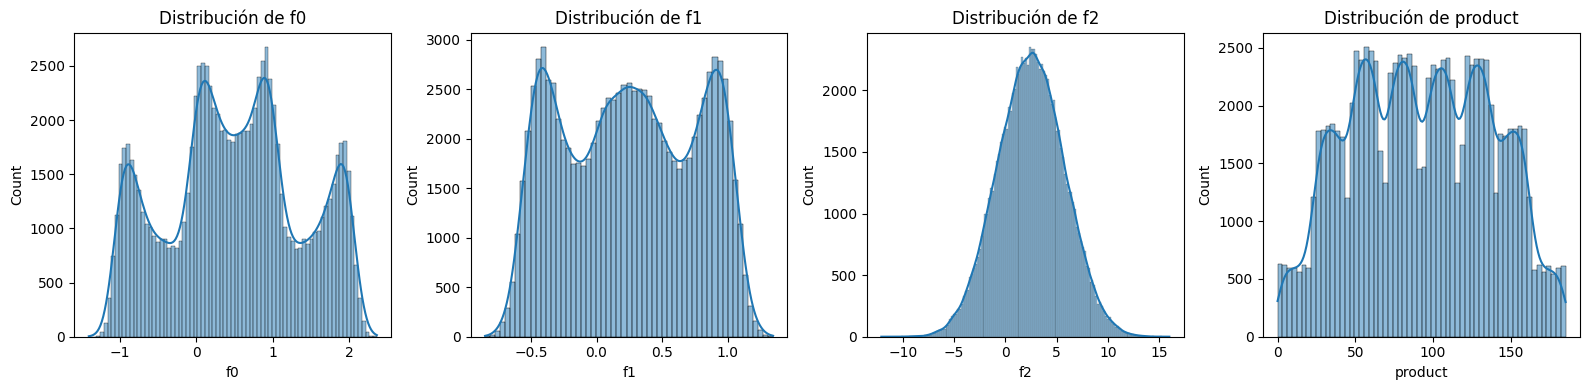

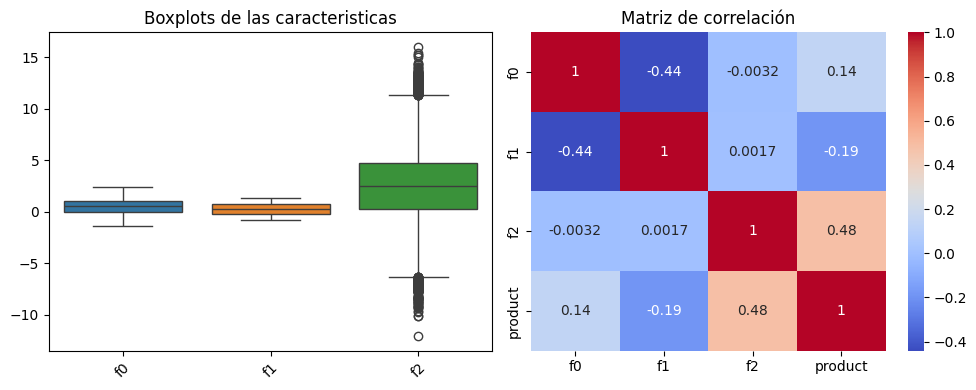


Valores únicos en la columna 'id': 99990


In [97]:
analizar_region('geo_data_0.csv')

Region 0:
- No tenemos datos nulos
- Se observa una correlación importante entre la caracteristica f2 y producto
- Tenemos 10 id de pozos duplicados
- El comportamiento de las distribuciones no son normales a excepción de la variable f2 que pareciera una campana perfecta lo cual nos arroja valores atipicos y con una distribucion mucho mas amplia que f0 y f1 donde se visualizan valores altamente concentrados

Primeras filas:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Estadísticas descriptivas:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


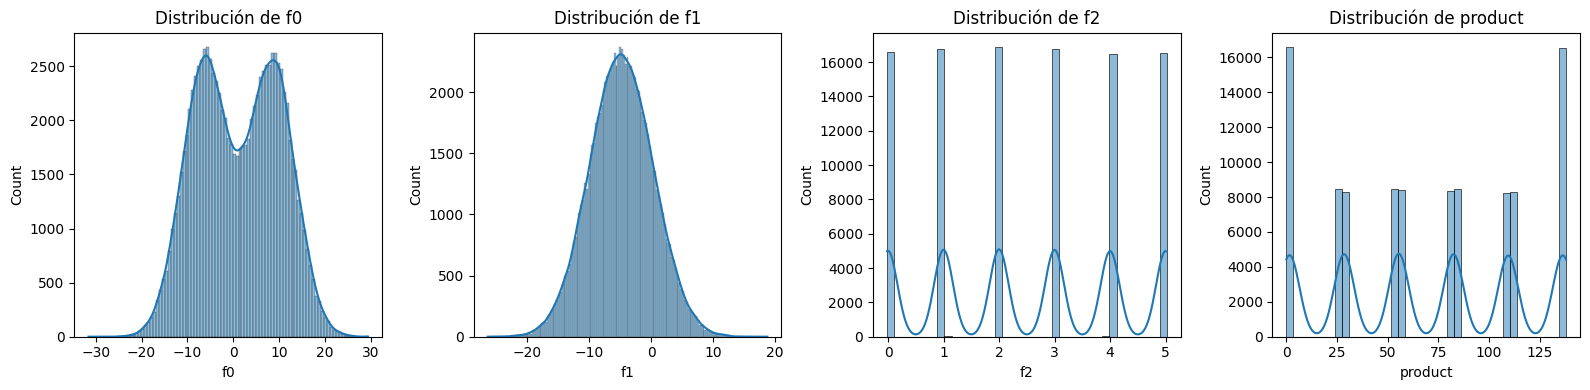

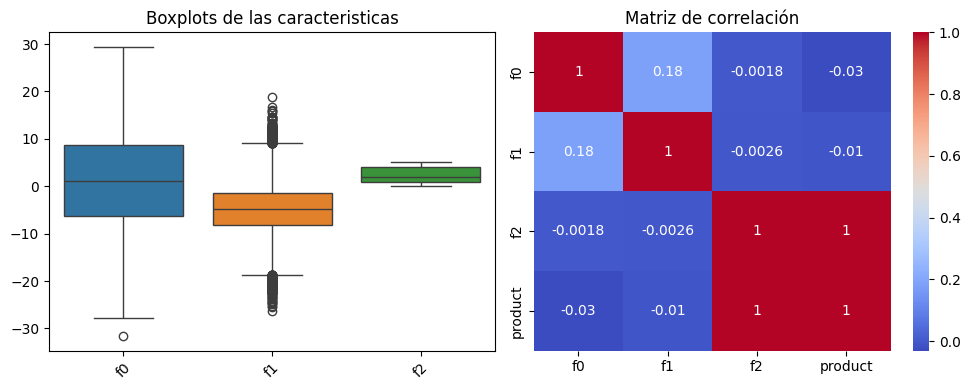


Valores únicos en la columna 'id': 99996


In [98]:
analizar_region('geo_data_1.csv')

Region 1:
- No tenemos datos nulos
- Existe una correlacion directa entre f2 y producto lo que implica que si se modifica f2 la variable product cambiara
- Tenemos 4 id de pozos duplicados
- La distribución de f2 y product pareciera que estan categorizadas lo cual no ocurre en f1 y pareciera una distribución normal, finalmente f0 tiene 2 picos que sugiere que este categorizada

Primeras filas:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Estadísticas descriptivas:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


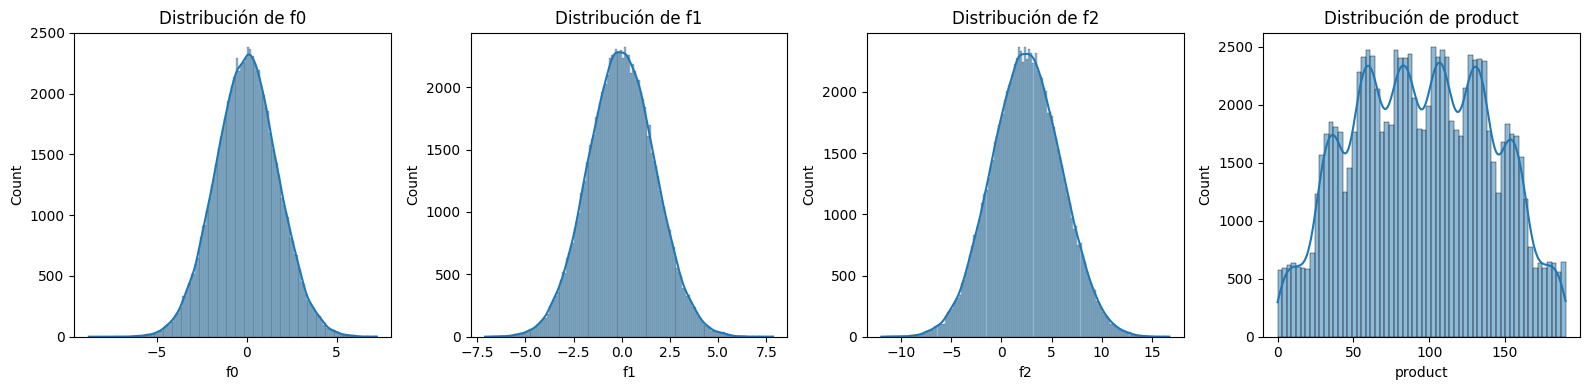

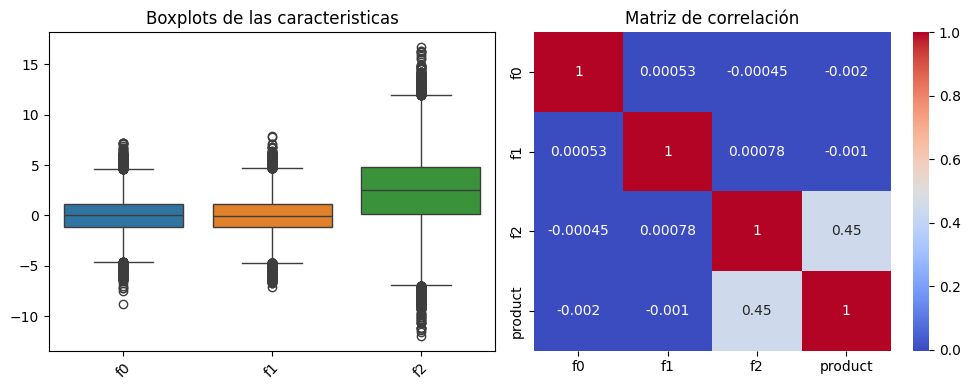


Valores únicos en la columna 'id': 99996


In [99]:
analizar_region('geo_data_2.csv')

Region 2:
- No tenemos datos nulos
- Existe una correlacion ligeramente positiva entre f2 y product.
- Tenemos 4 id de pozos duplicados
- La distribución de f0,f1 y f2 parecieran normales sin embargo todas tienen medias diferentes con valores atípicos y con una concentración moderada.

## Procesamiento y Transformacion

Al no tener valors nulos y menos del 1% son valores duplicados se procede a realizar una transformación de datos, entrenar el modelo, realizar predicciones y cálculos estadisticos.

In [107]:
def entrenar_evaluar_modelo(region_data, region_name):
    """
    Entrena y evalúa un modelo de regresión lineal para una región dada.

    Args:
        region_data (pandas.DataFrame): DataFrame con los datos de la región.
        region_name (str): Nombre de la región.
    """

    # Separar características y target
    x = region_data.drop(columns=["product", "id"])
    y = region_data["product"]

    # Identificar columnas por tipo
    num_features = ["f0", "f1", "f2"]

    # Pipelines de preprocesamiento
    num_pipeline = Pipeline([
        ("scaler", StandardScaler())
    ])

    # Combinar en un preprocesador general
    preprocessor = ColumnTransformer([
        ("num", num_pipeline, num_features),
    ])

    # Dividir los datos en train y test
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=12345)

    # Preprocesar los datos de entrenamiento y validación
    x_train_transformed = preprocessor.fit_transform(x_train)
    x_valid_transformed = preprocessor.transform(x_valid)

    # Modelo Regresion Lineal
    model_logistic = LinearRegression()

    # Entrenar el modelo con los datos transformados
    model_logistic.fit(x_train_transformed, y_train)

    # Predicciones y evaluación
    y_pred = model_logistic.predict(x_valid_transformed)

    # Calcular el volumen medio predicho
    volumen_medio = np.mean(y_pred)

    # Calcular el RMSE
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    # Calcular el R²
    r_cuadrado = r2_score(y_valid, y_pred)

    # Mostrar los resultados
    print(f"\nResultados para {region_name}:")
    print(f"Volumen medio predicho: {volumen_medio}")
    print(f"RMSE del modelo: {rmse}")
    print(f"R² del modelo: {r_cuadrado}")


In [108]:
# Cargar los datos
region0 = pd.read_csv('geo_data_0.csv')
region1 = pd.read_csv('geo_data_1.csv')
region2 = pd.read_csv('geo_data_2.csv')

# Entrenar y evaluar el modelo para cada región
entrenar_evaluar_modelo(region0, "Región 0")
entrenar_evaluar_modelo(region1, "Región 1")
entrenar_evaluar_modelo(region2, "Región 2")


Resultados para Región 0:
Volumen medio predicho: 92.59256778438035
RMSE del modelo: 37.5794217150813
R² del modelo: 0.27994321524487786

Resultados para Región 1:
Volumen medio predicho: 68.728546895446
RMSE del modelo: 0.893099286775617
R² del modelo: 0.9996233978805127

Resultados para Región 2:
Volumen medio predicho: 94.96504596800489
RMSE del modelo: 40.02970873393434
R² del modelo: 0.20524758386040465
